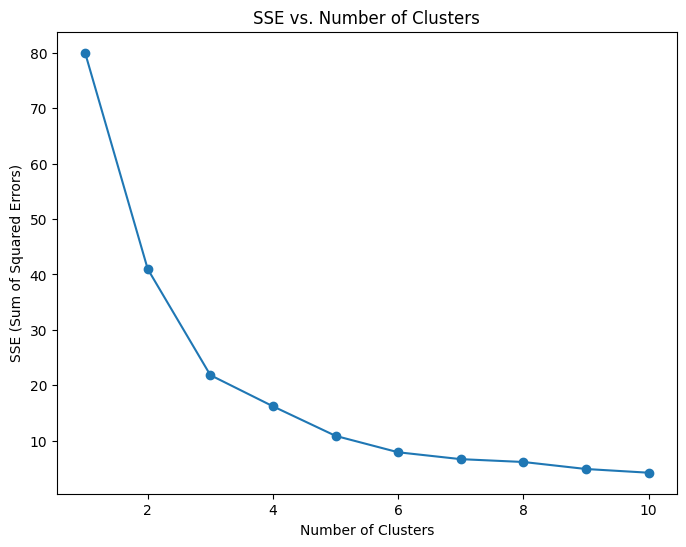

Silhouette Score (as a measure of clustering quality): 0.3859164881414348


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: Create a synthetic CSV file "income.csv" with 50 rows
names = ['Name' + str(i) for i in range(1, 51)]
ages = np.random.randint(18, 65, size=50)  # Random ages between 18 and 65
incomes = np.random.randint(20000, 100000, size=50)  # Random incomes between 20,000 and 100,000

# Create a DataFrame and save as CSV
df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Income': incomes
})

# Save to CSV
df.to_csv('income.csv', index=False)

# Step 2: Load the CSV file
df = pd.read_csv('income.csv')

# Step 3: Prepare the data for KMeans
# We will use 'Age' and 'Income' for clustering
X = df[['Age', 'Income']]

# Step 4: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Plot SSE vs. Number of clusters to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# Step 7: Choose optimal k (using elbow method, we look for the "elbow" point in the plot)
optimal_k = 3  # Example choice (based on the elbow method)

# Step 8: Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Step 9: Predict on the test set
y_pred = kmeans.predict(X_test_scaled)

# Step 10: Calculate accuracy (Silhouette Score as a measure for clustering)
sil_score = silhouette_score(X_test_scaled, y_pred)
print(f'Silhouette Score (as a measure of clustering quality): {sil_score}')


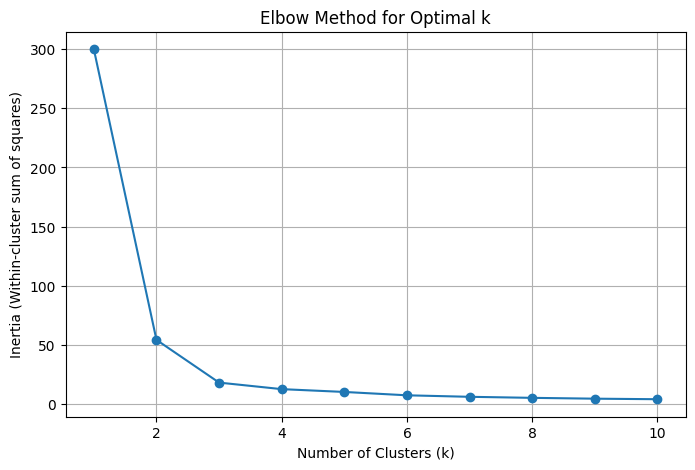

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Only petal length and width

# Step 2: Preprocessing - Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

# Step 1: Load dataset
df = pd.read_csv("heart.csv")  # Update path if needed

# Step 2: Remove outliers using Z-score
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Step 3: Convert text to numbers (if needed)
df_encoded = pd.get_dummies(df_no_outliers, drop_first=True)

# Step 4: Apply scaling
scaler = StandardScaler()
target_col = 'HeartDisease'  # Update if different
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5a: Train multiple models and compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

print("=== Accuracy without PCA ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

# Step 6: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("\n=== Accuracy with PCA (2 components) ===")
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test_pca, y_pred)
    print(f"{name}: {acc:.4f}")


=== Accuracy without PCA ===
Logistic Regression: 0.8889
SVM: 0.8889
Random Forest: 0.8889

=== Accuracy with PCA (2 components) ===
Logistic Regression: 0.8722
SVM: 0.8611
Random Forest: 0.8222


In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy using PCA with 2 components: {accuracy:.4f}")


Accuracy using PCA with 2 components: 0.5167
